# Introduction

Source Dataset: https://www.kaggle.com/dipam7/student-grade-prediction


Data Preprocessing Steps:
* Data Visualization
* Data Transformation
* Data Normalization
* Feature Selection
    

### Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

### Load Dataset

In [ ]:
raw_df = pd.read_csv("./student-mat.csv")
raw_df.head()

## Dataset Metadata
### Features  
#### Nominal Category
*   school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
* 	sex - student's sex (binary: 'F' - female or 'M' - male)
*	address - student's home address type (binary: 'U' - urban or 'R' - rural)
*	famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
*	Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
*	Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
*	Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
*	reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
*	guardian - student's guardian (nominal: 'mother', 'father' or 'other')

#### Ordinal Category ('yes' => 1 has higher value than 'no' => 0)
*	schoolsup - extra educational support (binary: yes or no)
*	famsup - family educational support (binary: yes or no)
*	paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
*	activities - extra-curricular activities (binary: yes or no)
*	nursery - attended nursery school (binary: yes or no)
*	higher - wants to take higher education (binary: yes or no)
*	internet - Internet access at home (binary: yes or no)
*	romantic - with a romantic relationship (binary: yes or no)

#### Prepared Ordinal Category
*	Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
*	Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)

#### Numeric
*	age - student's age (numeric: from 15 to 22)
*	traveltime - home to school travel time (numeric: 1 - 1 hour)
*	studytime - weekly study time (numeric: 1 - 10 hours)
*	failures - number of past class failures (numeric: n if 1<=n<3, else 4)
*	famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
*	freetime - free time after school (numeric: from 1 - very low to 5 - very high)
*	goout - going out with friends (numeric: from 1 - very low to 5 - very high)
*	Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
*	Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
*	health - current health status (numeric: from 1 - very bad to 5 - very good)
*	absences - number of school absences (numeric: from 0 to 93)
*   G1 - first period grade (numeric: from 0 to 20)
*   G2 - second period grade (numeric: from 0 to 20)
*   G3 - final grade (numeric: from 0 to 20)

### Label

*   avgGrade - Derived from (G1 + G2 + G3) / 3



In [ ]:
raw_df.dtypes

In [ ]:
df = raw_df.copy()
df['avgGrade'] = df.apply(lambda row: (row.G1 + row.G2 + row.G3)/3,axis=1)
df = df.drop(labels=['G1','G2','G3'],axis=1)
df.head()

In [ ]:
plt.figure(figsize=(5,5))
corr = df.corr()
ax = sns.heatmap(corr, annot=True,annot_kws={"fontsize" : 1})
plt.show()

In [ ]:
le = LabelEncoder()
ordinal = df.copy()
binary_feature = ['schoolsup','famsup','paid','activities','nursery','higher','internet','romantic'] #Ordinal Binary
ordinal[binary_feature] = ordinal[binary_feature].apply(lambda col: le.fit_transform(col))

In [ ]:
plt.figure(figsize=(5,5))
corr = ordinal.corr()
ax = sns.heatmap(corr, annot=False,annot_kws={"fontsize" : 9}, fmt=".1f")
plt.show()

In [ ]:
normal = ordinal.copy()
notObject = normal.columns[normal.dtypes!=object].tolist()
notObject.remove('avgGrade')
normal[notObject]=(normal[notObject]-normal[notObject].min())/(normal[notObject].max()-normal[notObject].min())

In [ ]:
normal.head()

In [ ]:
corr_target = abs(corr["avgGrade"])
bad_feature = corr_target[corr_target < 0.1]
print(bad_feature)
# print(babad_featureeature)

In [ ]:
# dropped = normal.drop(labels=['famsup','paid','activities','nursery'
#                              ,'famrel','freetime','Dalc','Walc','health','absences'],axis=1)
dropped = normal.copy()
dropped.head()

In [ ]:
dropped.dtypes

In [ ]:
one_hot_categorical = dropped.columns[dropped.dtypes==object].tolist()
dropped[one_hot_categorical] = dropped[one_hot_categorical].astype('category')
print(one_hot_categorical)

In [ ]:
oh_concat = dropped
oh_concat = pd.concat([oh_concat,pd.get_dummies(dropped['sex'],prefix='sex')],axis=1)
oh_concat = pd.concat([oh_concat,pd.get_dummies(dropped['school'],prefix='school')],axis=1)
oh_concat = pd.concat([oh_concat,pd.get_dummies(dropped['address'],prefix='address')],axis=1)
oh_concat = pd.concat([oh_concat,pd.get_dummies(dropped['famsize'],prefix='famsize')],axis=1)
oh_concat = pd.concat([oh_concat,pd.get_dummies(dropped['Pstatus'],prefix='Pstatus')],axis=1)
oh_concat = pd.concat([oh_concat,pd.get_dummies(dropped['Mjob'],prefix='Mjob')],axis=1)
oh_concat = pd.concat([oh_concat,pd.get_dummies(dropped['Fjob'],prefix='Fjob')],axis=1)
oh_concat = pd.concat([oh_concat,pd.get_dummies(dropped['reason'],prefix='reason')],axis=1)
oh_concat = pd.concat([oh_concat,pd.get_dummies(dropped['guardian'],prefix='guardian')],axis=1)
oh_concat = oh_concat.drop(labels=one_hot_categorical,axis=1)

In [ ]:
corr_target = abs(oh_concat.corr()["avgGrade"])
bad_feature = corr_target[corr_target < 0.1]
print(bad_feature)
# print(babad_featureeature)

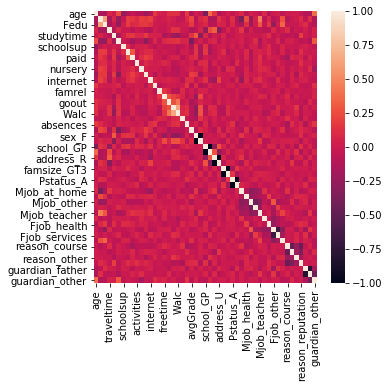

In [16]:
plt.figure(figsize=(5,5))
corr = oh_concat.corr()
ax = sns.heatmap(corr, annot=False,annot_kws={"fontsize" : 2}, fmt=".1f")
plt.show()
oh_concat.to_csv('all_prepared.csv')

In [17]:
oh_minimized = oh_concat.copy()
oh_minimized = oh_concat.drop(labels=['school_GP','school_MS','Pstatus_A','Pstatus_T','Fjob_at_home','Fjob_health'
                                ,'Fjob_services','reason_home','reason_other','guardian_father','guardian_mother'],axis=1)

In [18]:
oh_dropped = oh_concat.copy()
oh_dropped = oh_concat.drop(labels=['school_GP','school_MS','famsize_GT3','famsize_LE3','Pstatus_A','Pstatus_T','Mjob_services'
                          ,'Mjob_teacher','Fjob_at_home','Fjob_health','Fjob_other','Fjob_services'
                          ,'reason_course','reason_home','reason_other','reason_reputation','guardian_father'
                          ,'guardian_mother','guardian_other'],axis=1)

In [28]:
#Raw Data + Label without categorical feature
phase1 = df.copy().drop(labels=df.columns[df.dtypes==object],axis=1) #mae: 3.2583 - mse: 16.7854, early stop: mae: 2.9213 - mse: 12.6809

#Ordinal Category Added
phase2 = ordinal.copy().drop(labels=ordinal.columns[ordinal.dtypes==object],axis=1) #mae: 3.4332 - mse: 17.3245, early: mae: 2.9872 - mse: 13.4815

#Data Normalized
phase3 = normal.copy().drop(labels=normal.columns[normal.dtypes==object],axis=1) #mae: 3.8822 - mse: 26.1232, early : mae: 3.0266 - mse: 14.1503

#Feature Selection With CorrelationCoefficient > 0.1
phase4 = dropped.copy().drop(labels=dropped.columns[dropped.dtypes=='category'],axis=1) #mae: 3.5513 - mse: 21.8263, early: mae: 3.2377 - mse: 15.4592

#One-Hot Encoding For Nominal Category
phase5 = oh_concat.copy() #mae: 3.7460 - mse: 23.5039, mae: 2.8213 - mse: 12.1035

#phase5.5 --> Without Dropping in Phase 4, mae: 3.3277 - mse: 17.1304, es: mae: 2.9851 - mse: 13.8183

#Feature Selection With CorrelationCoefficient > 0.05
phase6 = oh_minimized.copy() #mae: 4.4667 - mse: 29.3205, early: mae: 2.8257 - mse: 12.2229

#Feature Selection With CorrelationCoefficient > 0.1
phase7 = oh_dropped.copy() #mae: 3.9745 - mse: 23.1792, early: mae: 2.8674 - mse: 12.6983

pil = phase5
# pil.dtypes
pil.head()

,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0.428571,1.00,1.00,0.333333,0.333333,0.0,1.0,0.0,0.0,0.0,...,0,0,1,1,0,0,0,0,1,0
1,0.285714,0.25,0.25,0.000000,0.333333,0.0,0.0,1.0,0.0,0.0,...,1,0,0,1,0,0,0,1,0,0
2,0.000000,0.25,0.25,0.000000,0.333333,1.0,1.0,0.0,1.0,0.0,...,1,0,0,0,0,1,0,0,1,0
3,0.000000,1.00,0.50,0.000000,0.666667,0.0,0.0,1.0,1.0,1.0,...,0,1,0,0,1,0,0,0,1,0
4,0.142857,0.75,0.75,0.000000,0.333333,0.0,0.0,1.0,1.0,0.0,...,1,0,0,0,1,0,0,1,0,0


In [29]:
x_train = pil.copy().sample(frac=0.8,random_state=0)
x_test = pil.drop(x_train.index)

In [30]:
y_train = x_train.pop('avgGrade')
y_test = x_test.pop('avgGrade')

In [31]:
def build_model():
    
    model = keras.Sequential()
    model.add(layers.Dense(100, activation='relu',input_shape=[len(x_train.columns)]))
    model.add(layers.Dense(100, activation='relu'))
    model.add(layers.Dense(1))
    
#     optimizer = tf.keras.optimizers.RMSprop(0.001)
    optimizer = keras.optimizers.Adam(learning_rate=0.001)
    
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae','mse'])
    
    return model


a = keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='auto'
)

model = build_model()

In [32]:
model.fit(x_train, y_train, epochs=500, verbose=1, validation_split=0.2 ,callbacks=[tfdocs.modeling.EpochDots(),a])

Train on 252 samples, validate on 64 samples
Epoch 1/500
 32/252 [==>...........................] - ETA: 3s - loss: 131.7852 - mae: 10.8927 - mse: 131.7852
Epoch: 0, loss:102.5905,  mae:9.3907,  mse:102.5905,  val_loss:99.1755,  val_mae:9.4202,  val_mse:99.1755,  
252/252 [==============================] - 1s 2ms/sample - loss: 102.5905 - mae: 9.3907 - mse: 102.5905 - val_loss: 99.1755 - val_mae: 9.4202 - val_mse: 99.1755
Epoch 2/500
252/252 [==============================] - 0s 148us/sample - loss: 68.9950 - mae: 7.4676 - mse: 68.9950 - val_loss: 60.1650 - val_mae: 7.0530 - val_mse: 60.1650
Epoch 3/500
252/252 [==============================] - 0s 163us/sample - loss: 35.7423 - mae: 5.0151 - mse: 35.7423 - val_loss: 23.3648 - val_mae: 4.0795 - val_mse: 23.3648
Epoch 4/500
252/252 [==============================] - 0s 143us/sample - loss: 15.5794 - mae: 3.1970 - mse: 15.5794 - val_loss: 12.1484 - val_mae: 2.7354 - val_mse: 12.1484
Epoch 5/500
252/252 [==============================] - 

In [33]:
error = model.evaluate(x_test, y_test, verbose=2)

79/79 - 0s - loss: 13.8183 - mae: 2.9851 - mse: 13.8183


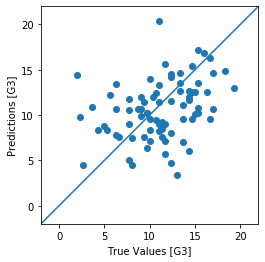

In [26]:
prediction = model.predict(x_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, prediction)
plt.xlabel('True Values [G3]')
plt.ylabel('Predictions [G3]')
lims = [-2, 22]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

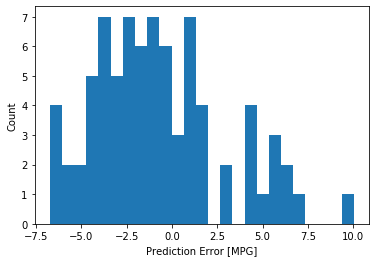

In [699]:
error = prediction - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")